# EDA Notebook - Top 50 Amazon Product Reviews for Books, Games, and Movies

In [41]:
import os
import pandas as pd
import seaborn as sns
import functions.token_functions as tf
import functions.data_loading as dl

## Loading csv files

In [42]:
games_dir = '../data/games'
books_dir = '../data/books'
movies_dir = '../data/movies'

In [43]:
games_df = dl.read_csv_files(games_dir)
books_df = dl.read_csv_files(books_dir)
movies_df = dl.read_csv_files(movies_dir)

In [44]:
# Creates a combined dataframe if needed for analysis
# Create an empty list to store the review dataframes
df_list = []

for root, dirs, files in os.walk('../data'):
    for filename in files:
        # Read the CSV file into a datadrame
        df = pd.read_csv(os.path.join(root, filename), index_col=0)

        # Append the dataframe to the list
        df_list.append(df)

# Combine the dataframes into a single dataframe
combined_df = pd.concat(df_list, ignore_index=True)

## Games Data Exploration

In [45]:
games_df.isna().sum()

name            0
game_title      0
review_title    0
review          3
rating          0
date_place      0
dtype: int64

In [46]:
games_df = games_df.dropna()
games_df.shape

(1417, 6)

In [47]:
games_df.head(3)

,name,game_title,review_title,review,rating,date_place
0,Jesus Díaz,Just Dance 2022 (Xbox One/Series X),JUEGO ORIGINAL,El juego viene sellado de fábrica. ¡Muy buena ...,5.0,"Reviewed in the United States 🇺🇸 on June 1, 2023"
1,Bill P Englert,Just Dance 2022 (Xbox One/Series X),Love this for the family,Really enjoy Just Dance especially when doing ...,4.0,Reviewed in the United States 🇺🇸 on December 1...
2,s,Just Dance 2022 (Xbox One/Series X),Fun game,Nothing wrong with purchase but game itself do...,5.0,Reviewed in the United States 🇺🇸 on November 2...


In [48]:
games_df['game_title'].unique()

array(['Just Dance 2022 (Xbox One/Series X)',
       'Anno 1800 - Standard Edition, Xbox Series X',
       'Saints Row Day 1 Edition - Xbox Series X',
       'NBA 2K23 Michael Jordan Edition - Xbox [Digital Code]',
       'EA SPORTS PGA Tour - Xbox Series X',
       'MX vs ATV Legends for Xbox One and Xbox Series X',
       'Star Wars Jedi: Survivor - Xbox Series X',
       'Just Dance 2023 Edition - Code in box, Xbox Series X|S',
       'Dying Light 2 Stay Human - Xbox Series X',
       'Resident Evil 4 - Xbox Series X',
       'Hogwarts Legacy: Digital Deluxe Edition - Xbox [Digital Code]',
       'Forza Horizon 5: Premium Edition – Xbox & Windows [Digital Code]',
       'Elden Ring - Xbox Series X',
       'Street Fighter 6 Deluxe Edition - XBX',
       'Dead Island 2: Day 1 Edition - Xbox Series X',
       'Diablo IV - Ultimate Edition - Xbox [Digital Code]',
       "Five Nights at Freddy's: Security Breach (XSX)",
       'Minecraft Legends Deluxe Edition: Xbox Series X and Xbox On

In [49]:
# Investigate different languages that make up the review text
games_df['lang'] = games_df['review'].apply(tf.detect_language)
games_df['lang'].value_counts()

lang
en         1293
es           35
ja           25
af           10
so            6
pt            6
da            5
fr            5
it            4
de            4
tl            3
unknown       3
sl            3
et            3
no            3
id            2
ro            1
tr            1
ca            1
lt            1
fi            1
sw            1
nl            1
Name: count, dtype: int64

In [50]:
# drop non english reviews
games_df = games_df.query('lang == "en"')

In [51]:
# Convert pandas series of reviews to a list in order to get stats on entire review text
games_texts = games_df['review'].tolist()
games_texts = " ".join(games_texts)
tf.descriptive_stats(games_texts)

There are 451582 tokens in the data.
There are 132 unique tokens in the data.
There are 451582 characters in the data.
The lexical diversity is 0.000 in the data.
[(' ', 82757), ('e', 41468), ('t', 31594), ('a', 28819), ('o', 26844)]


[451582, 132, 0.0, 451582]

<AxesSubplot:xlabel='rating', ylabel='count'>

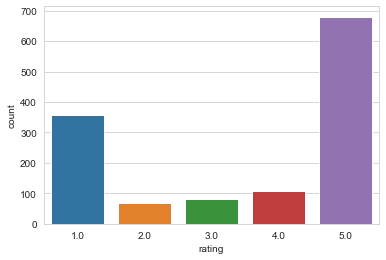

In [71]:
sns.countplot(x=games_df['rating'])

## Books Data Exploration

In [53]:
books_df.isna().sum()

name              5
movie_title       0
review_title     10
review          186
rating            0
date_place        0
dtype: int64

In [54]:
books_df = books_df.dropna()
books_df.shape

(104658, 6)

In [55]:
books_df.head(3)

,name,movie_title,review_title,review,rating,date_place
0,MamaBear2,"First Grade, Here I Come!",Cute Book,Cute Book about going into 1st grade! I though...,4.0,"Reviewed in the United States on May 24, 2023"
1,Donnie Noble,"First Grade, Here I Come!",Must for your new 1st grader.,"I absolutely loved this book! It was cute, it ...",5.0,"Reviewed in the United States on May 27, 2023"
2,Sarah,"First Grade, Here I Come!",Good book just to advance for a first grader.,"I like the book, good condition. Just overwhel...",4.0,"Reviewed in the United States on May 31, 2023"


In [56]:
books_df['movie_title'].unique()

array(['First Grade, Here I Come!', 'The 48 Laws of Power',
       'Haunting Adeline (Cat and Mouse Duet)',
       "The Covenant of Water (Oprah's Book Club)",
       'Read Me When You Need Me.', 'Ugly Love: A Novel',
       'Demon Copperhead: A Pulitzer Prize Winner',
       'If He Had Been with Me',
       'Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones',
       'I Love You to the Moon and Back',
       'Things We Never Got Over (Knockemout)',
       'Central Park West: A Crime Novel', "Oh, the Places You'll Go!  ",
       'It Ends with Us: A Novel (1)',
       'Icebreaker: A Novel (The Maple Hills Series)',
       'The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)',
       'Taylor Swift: A Little Golden Book Biography',
       'Rich Dad Poor Dad: What the Rich Teach Their Kids About Money That the Poor and Middle Class Do Not!',
       'I Will Teach You to Be Rich: No Guilt. No Excuses. Just a 6-Week Program That Works (Seco

In [57]:
# Investigate different languages that make up the review text
books_df['lang'] = books_df['review'].apply(tf.detect_language)
books_df['lang'].value_counts()

lang
en         100020
af            867
es            486
so            384
de            338
it            240
fr            227
ro            226
ca            209
sl            184
pt            171
da            171
ja            153
tl            138
nl            137
no            122
unknown        98
cy             84
et             80
hu             48
sk             46
sv             46
pl             35
sw             33
fi             25
vi             25
sq             22
id             19
hr              8
tr              7
lt              5
cs              3
lv              1
Name: count, dtype: int64

In [58]:
# drop non english reviews
books_df = books_df.query('lang == "en"')

In [59]:
# Convert pandas series of reviews to a list in order to get stats on entire review text
books_texts = books_df['review'].tolist()
books_texts = " ".join(books_texts)
tf.descriptive_stats(books_texts)

There are 27539229 tokens in the data.
There are 1060 unique tokens in the data.
There are 27539229 characters in the data.
The lexical diversity is 0.000 in the data.
[(' ', 5028204), ('e', 2493481), ('t', 1967971), ('o', 1810772), ('a', 1650071)]


[27539229, 1060, 0.0, 27539229]

<AxesSubplot:xlabel='rating', ylabel='count'>

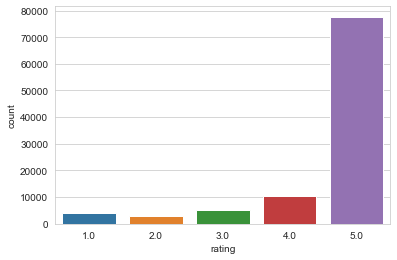

In [69]:
sns.countplot(x=books_df['rating'])

## Movies Data Exploration

In [61]:
movies_df.isna().sum()

name             0
movie_title      0
review_title     9
review          12
rating           0
date_place       0
dtype: int64

In [62]:
movies_df = movies_df.dropna()
movies_df.shape

(22871, 6)

In [63]:
movies_df.head(3)

,name,movie_title,review_title,review,rating,date_place
0,John's Horror Corner,Knock at the Cabin,Wonderful characters making heart-wrenching mo...,"I’ve always been a Shyamalan fan, and this is ...",4.0,"Reviewed in the United States 🇺🇸 on March 17, ..."
1,Sue E. Ramsey,Knock at the Cabin,Different.,"This movie really makes you think about the ""w...",4.0,"Reviewed in the United States 🇺🇸 on May 24, 2023"
2,Tramaine Montell Ford ✪ (Tramaine Montell) 🎶,Knock at the Cabin,"I don't care for the horror genre, but I loved...","I watched this movie 4 times. 3 times alone, a...",5.0,"Reviewed in the United States 🇺🇸 on May 18, 2023"


In [64]:
movies_df['movie_title'].unique()

array(['Knock at the Cabin', 'John Wick: Chapter 4 - Bonus X-Ray Edition',
       'Avatar: The Way of Water', "Magic Mike's Last Dance",
       'The Super Mario Bros. Movie', "Guy Ritchie's The Covenant",
       'A Good Person', 'A Man Called Otto', 'The Croods: A New Age',
       'Fifty Shades Darker', 'Reunion, Pt. 2',
       'Operation Fortune: Ruse de Guerre',
       'Puss in Boots: The Last Wish', 'The Ritual Killer',
       'F9: The Fast Saga', "The Pope's Exorcist",
       'Spider-Man: Into the Spider-Verse', 'The Whale',
       '2 Fast 2 Furious', 'The Fast and the Furious', 'M3GAN',
       'Cocaine Bear', 'Plane', 'Evil Dead Rise', 'John Wick: Chapter 4',
       'Moving On', 'Shazam! Fury of the Gods', 'Champions', 'Sisu', 65,
       'Renfield', '80 For Brady', 'Pitch Perfect 3', 'Scream VI',
       'Love Again', 'Dungeons & Dragons: Honor Among Thieves',
       'Jesus Revolution', 'Creed III'], dtype=object)

In [65]:
# Investigate different languages that make up the review text
movies_df['lang'] = movies_df['review'].apply(tf.detect_language)
movies_df['lang'].value_counts()

lang
en         19774
af           662
de           283
ro           235
es           192
so           190
fr           157
sk           143
sl           126
it           121
no           115
da           102
ca            98
unknown       90
nl            88
cy            87
tl            65
et            58
sw            34
hr            31
hu            31
ja            30
pt            28
id            27
fi            19
pl            17
sv            16
vi            16
tr            15
sq             9
lt             7
lv             3
cs             2
Name: count, dtype: int64

In [66]:
# drop non english reviews
movies_df = movies_df.query('lang == "en"')

In [67]:
# Convert pandas series of reviews to a list in order to get stats on entire review text
movies_texts = movies_df['review'].tolist()
movies_texts = " ".join(movies_texts)
tf.descriptive_stats(movies_texts)

There are 3444575 tokens in the data.
There are 252 unique tokens in the data.
There are 3444575 characters in the data.
The lexical diversity is 0.000 in the data.
[(' ', 629952), ('e', 313487), ('t', 248536), ('a', 210920), ('o', 205400)]


[3444575, 252, 0.0, 3444575]

<AxesSubplot:xlabel='rating', ylabel='count'>

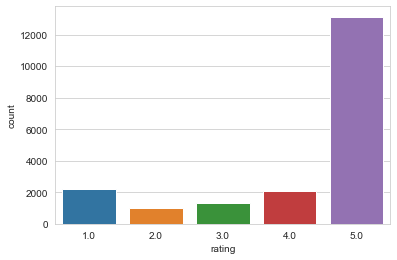

In [70]:
sns.countplot(x=movies_df['rating'])